In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [23]:
df = sns.load_dataset("titanic")
df.isnull().sum()
성별평균= df.groupby("sex")["age"].transform("mean")
df["age"] = df["age"].fillna(성별평균).round(3)
df["sex"].value_counts()
df.drop(["who" , 'alive'] , axis = 1, inplace = True)
df.deck.fillna(method = "bfill", inplace= True)
df.loc[890,"deck"] = df.deck.mode()[0]
df["embarked"] = df["embarked"].fillna("S")
df["embark_town"] = df["embark_town"].fillna("Southampton")

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
adult_male     0
deck           0
embark_town    0
alone          0
dtype: int64

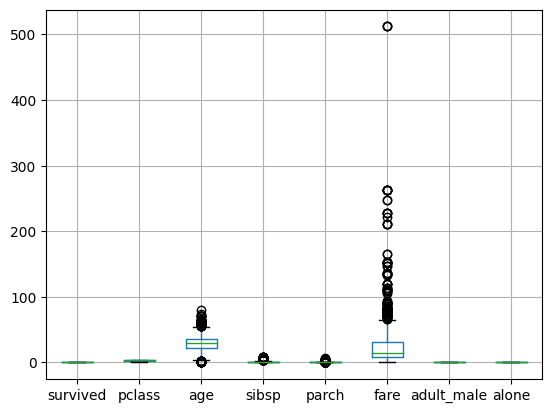

In [25]:
df.boxplot(); plt.show()

In [26]:
q1,q2,q3 = df.fare.quantile([0.25,0.5,0.75])
iqr = q3-q1
lo = q1-1.5*iqr
hi = q3 + 1.5*iqr
print(iqr , lo , hi)

23.0896 -26.724 65.6344


In [27]:
df.loc[df["fare"] > hi, ["fare"]] = hi

In [28]:
df= pd.get_dummies(df)

In [29]:
df.drop(["adult_male", "alone"], axis = 1, inplace = True)

In [30]:
x = df.drop(["survived"], axis = 1)
y = df["survived"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8, random_state=1234)

In [33]:
train_x.shape

(712, 23)

In [34]:
test_x.shape

(179, 23)

In [41]:
train_x

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
125,3,12.000,1,0,11.2417,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
305,1,0.920,1,2,65.6344,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
631,3,51.000,0,0,7.0542,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
643,3,30.727,0,0,56.4958,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
808,2,39.000,0,0,13.0000,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,3,18.000,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
53,2,29.000,1,0,26.0000,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
294,3,24.000,0,0,7.8958,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
723,2,50.000,0,0,13.0000,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [38]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
lo.fit(train_x, train_y)

c:\Users\poscouser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [46]:
lo.predict_proba(train_x)

array([[0.76510983, 0.23489017],
       [0.32151173, 0.67848827],
       [0.96792162, 0.03207838],
       ...,
       [0.89842443, 0.10157557],
       [0.8408064 , 0.1591936 ],
       [0.82208373, 0.17791627]])

In [49]:
lo.predict(test_x)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [69]:
test_y_pred = lo.predict_proba(test_x)

In [65]:
pred = lo.predict(test_x)

In [60]:
lo.score(test_x, test_y)

0.8100558659217877

In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, test_y_pred[:,0]) #예측 확률에 대한 적합도, 1에 가까울수록 좋은 모델

0.128178243774574

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y, pred )) #test x
print(classification_report(test_y , pred))

[[97 12]
 [22 48]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       109
           1       0.80      0.69      0.74        70

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

